In [8]:
%matplotlib inline
from sklearn.metrics import mean_squared_error


# Comparing random forests and the multi-output meta estimator


An example to compare multi-output regression with random forest and
the :ref:`multioutput.MultiOutputRegressor <multiclass>` meta-estimator.

This example illustrates the use of the
:ref:`multioutput.MultiOutputRegressor <multiclass>` meta-estimator
to perform multi-output regression. A random forest regressor is used,
which supports multi-output regression natively, so the results can be
compared.

The random forest regressor will only ever predict values within the
range of observations or closer to zero for each of the targets. As a
result the predictions are biased towards the centre of the circle.

Using a single underlying feature the model learns both the
x and y coordinate as output.



In [9]:
print(__doc__)

# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=400,
                                                    random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)


y_rf

Automatically created module for IPython interactive environment


array([[-0.27177345,  3.00944797],
       [-0.48911161, -1.84942666],
       [ 2.12330105,  1.34825669],
       [ 2.8150409 ,  0.47429279],
       [-0.80439742, -2.56223692],
       [ 2.59757322, -1.21066327],
       [-2.30594371, -1.98044599],
       [ 1.6899545 , -2.18126218],
       [-3.29874622, -0.40644306],
       [ 2.99337965, -0.42131396],
       [ 3.12915141, -0.13166439],
       [-1.87995863, -0.38467079],
       [ 0.65508842, -3.00228306],
       [-0.78557882,  3.052394  ],
       [-1.87706748, -0.39471488],
       [-1.95083736, -2.67277977],
       [ 3.27591327, -0.87664343],
       [ 0.38313721,  2.89638782],
       [ 1.73557992,  1.0333783 ],
       [-2.40519481,  2.30896422],
       [ 2.25700166, -1.27298779],
       [-1.51469961,  2.55090357],
       [ 1.64828118,  2.54980449],
       [-0.24897343, -3.16179842],
       [-3.39666741, -0.18593426],
       [ 1.12104927,  2.23945782],
       [-2.31456414, -2.47136383],
       [ 2.76548447,  1.6898881 ],
       [ 1.13566218,

In [10]:
y_test

array([[-0.07856445,  3.2240646 ],
       [-1.32071125, -2.78686284],
       [ 1.50229249,  3.08095892],
       [ 3.2516022 ,  0.666121  ],
       [-0.74913146, -2.98947411],
       [ 2.61678635, -1.4829823 ],
       [-1.52297472, -3.07814001],
       [ 1.75325861, -2.39730995],
       [-3.62710831,  0.40398389],
       [ 2.56762796, -1.14460887],
       [ 3.19507202,  0.61281399],
       [-1.50708111, -3.08232965],
       [ 1.43127542, -3.32201576],
       [ 0.06481955,  3.07752872],
       [-2.57003041, -1.93150557],
       [-2.7351137 , -0.14816319],
       [ 2.28167653,  1.67927857],
       [ 0.57897219,  3.39780294],
       [ 2.74820081, -0.29217399],
       [-1.64386114,  2.90092672],
       [ 2.91610515,  0.96878796],
       [-0.0907859 ,  3.49048879],
       [ 0.9299669 ,  3.13885199],
       [-0.25944976, -2.86336285],
       [-2.82559305, -0.27230972],
       [ 2.42852386,  2.89250399],
       [-1.76682513, -2.12743301],
       [ 2.82266256,  1.01050195],
       [ 1.45476814,

In [12]:
mean_squared_error(y_rf[:1,], y_test[:1,])

0.041695007305584793

In [13]:
mean_squared_error(y_multirf[:1,], y_test[:1,])

0.041488903520908553

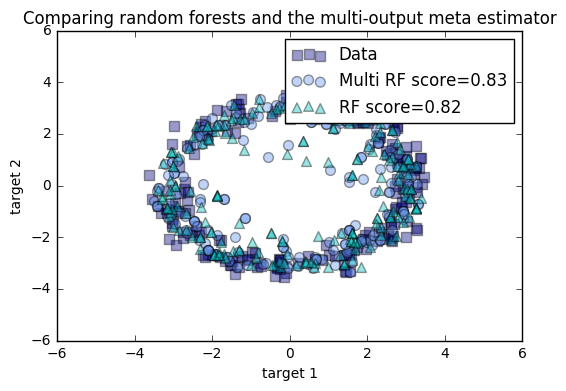

In [3]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1],
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1],
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1],
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()